<a href="https://colab.research.google.com/github/Yashaswi04/Data-Science--VCET/blob/main/Titanic_tested.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1. logistic Regression

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling missing values

logr=LogisticRegression()

df=pd.read_csv("tested.csv")

# Impute missing values using the most frequent value for each column
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df))
df_imputed.columns = df.columns  # Restore column names

x = df_imputed.drop('PassengerId', axis=1)
x = x.drop('Embarked', axis=1)
y = df_imputed['Embarked']

# Identify columns with non-numeric data
non_numeric_columns = x.select_dtypes(exclude=['number']).columns

# Apply LabelEncoder to convert non-numeric data to numerical labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    x[column] = label_encoder.fit_transform(x[column])

X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=1,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.6904761904761905
              precision    recall  f1-score   support

           C       0.48      0.43      0.45        23
           Q       0.00      0.00      0.00        15
           S       0.73      0.88      0.80        88

    accuracy                           0.69       126
   macro avg       0.40      0.44      0.42       126
weighted avg       0.60      0.69      0.64       126

[[10  0 13]
 [ 0  0 15]
 [11  0 77]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score

nb=GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.4)

nb.fit(X_train,y_train)

y_pred1=nb.predict(X_test)

print("Naive Bayes: ",accuracy_score(y_test,y_pred1))

Naive Bayes:  0.4107142857142857


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier(n_neighbors=5)

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0)

train=knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.6666666666666666


In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dt=tree.DecisionTreeClassifier()

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

train=dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.7380952380952381


In [ ]:
# Random Forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

train=rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.8095238095238095


In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gbm=GradientBoostingClassifier(n_estimators=10)

X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=0,test_size=0.2)

gbm.fit(X_train,Y_train)

y_pred=gbm.predict(X_test)

print("GBM: ",accuracy_score(Y_test,y_pred))

GBM:  0.8452380952380952


In [ ]:
import pandas as pd              #pd is an Alias

#Dealing with Missing Values
#Dealing with outliers
#Converting into categorical or numerical
#Dealing with Imbalance
#Feature selection
#Dimentionality Reduction

df=pd.read_csv("tested.csv")

#Preparing X and Y

X = df.drop('PassengerId', axis=1)
X = X.drop('Embarked', axis=1)
Y = df['Embarked']

# Convert string columns to numerical using one-hot encoding
X = pd.get_dummies(X)  # Convert categorical features to numerical

# Fill NaN values with a suitable strategy (e.g., most frequent value)
X = X.fillna(X.mode().iloc[0]) # Fill NaN with the most frequent value for each column

print(X)
print(Y)


     Survived  Pclass   Age  SibSp  Parch      Fare  \
0           0       3  34.5      0      0    7.8292   
1           1       3  47.0      1      0    7.0000   
2           0       2  62.0      0      0    9.6875   
3           0       3  27.0      0      0    8.6625   
4           1       3  22.0      1      1   12.2875   
..        ...     ...   ...    ...    ...       ...   
413         0       3  21.0      0      0    8.0500   
414         1       1  39.0      0      0  108.9000   
415         0       3  38.5      0      0    7.2500   
416         0       3  21.0      0      0    8.0500   
417         0       3  21.0      1      1   22.3583   

     Name_Abbott, Master. Eugene Joseph  Name_Abelseth, Miss. Karen Marie  \
0                                 False                             False   
1                                 False                             False   
2                                 False                             False   
3                              

In [ ]:
# Feature Selection 1

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

print(featuresScores)

           Specs      Score
0       Survived   4.446112
1         Pclass  18.087531
2            Age  73.570300
3          SibSp   8.338599
4          Parch  19.210552
..           ...        ...
860  Cabin_F G63   0.548148
861     Cabin_F2   0.548148
862    Cabin_F33   0.548148
863     Cabin_F4   1.096296
864     Cabin_G6   0.548148

[865 rows x 2 columns]


[3.44091014e-03 3.59560824e-02 1.34738014e-02 7.74017628e-03
 9.04292010e-03 2.19994512e-02 2.60730081e-05 2.16931330e-04
 9.18740290e-06 6.86756219e-06 3.28427229e-03 8.30934168e-06
 6.06113258e-06 1.96311736e-04 1.35804680e-05 2.75276662e-05
 3.28081212e-06 1.55879142e-05 1.55407651e-06 8.33948598e-06
 3.76497631e-06 7.53840056e-05 7.60301405e-06 2.10129971e-05
 1.43078413e-05 5.96574239e-06 2.69576589e-03 3.02621369e-03
 6.30477091e-06 1.10508807e-03 3.38420042e-03 3.43495438e-04
 3.44477195e-06 2.76298126e-03 6.24695931e-04 2.03277488e-05
 1.16551703e-04 4.34774445e-05 2.64800948e-05 3.29823731e-03
 2.21918923e-04 3.19031641e-03 8.80156119e-06 3.97922260e-04
 1.25783850e-04 5.87980462e-06 3.21849246e-03 1.89976142e-04
 2.31497223e-05 2.25553441e-03 1.40407215e-04 2.32066514e-04
 2.12086806e-03 2.53923857e-05 2.89906876e-05 2.10214003e-04
 3.05273288e-05 2.95861393e-03 3.38769908e-03 7.78832256e-04
 3.32900054e-03 2.85534057e-04 8.82325742e-06 7.72680381e-06
 3.65541335e-03 1.882180

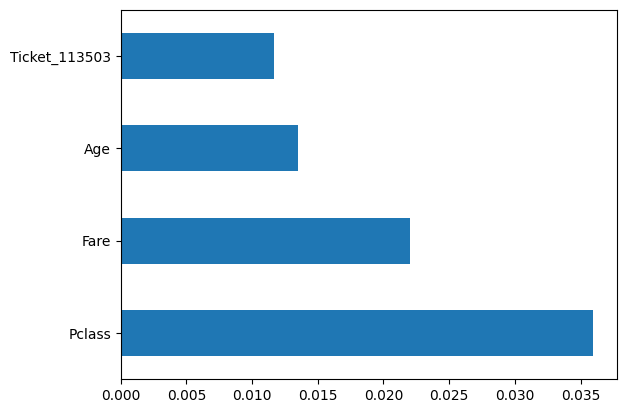

In [ ]:
#Feature Selection 2

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(4).plot(kind='barh')
plt.show()

In [ ]:


#Numerical to Categorical

from sklearn.preprocessing import LabelEncoder

# Check if 'Survived' is already categorical. If not, proceed with pd.cut
if not pd.api.types.is_categorical_dtype(df['Survived']):
    df['Survived']=pd.cut(df['Survived'],3,labels=['0','1','2'])

# Similar check for 'Pclass'
if not pd.api.types.is_categorical_dtype(df['Pclass']):
    df['Pclass']=pd.cut(df['Pclass'],3,labels=['0','1','2'])

# For 'Name' and 'Sex', you might want to use Label Encoding
le = LabelEncoder()
df['Sex_Encoded'] = le.fit_transform(df['Sex'])

print(df)

X = df.drop('PassengerId', axis=1)
X = X.drop('Embarked', axis=1)
Y = df['Embarked']
print(Y)
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)

     PassengerId Survived Pclass  \
0            892        0      2   
1            893        2      2   
2            894        0      1   
3            895        0      2   
4            896        2      2   
..           ...      ...    ...   
413         1305        0      2   
414         1306        2      0   
415         1307        0      2   
416         1308        0      2   
417         1309        0      2   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...   ...    ...    ...   


In [ ]:
#Categorical to Numerical

le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)

In [ ]:
#Dealing with missing values

'''
1. Use Drop (df.drop())
2. use Replace (df.replace("back","DOS"))
3. Fill NA ()
'''
print(df.isnull().sum())
df['Item_Weight'].fillna((df['Item_Weight'].mean() / df['Item_Weight'].median() / df['Item_Weight'].mode()), inplace=True) #Imputing Numerical Values

df['Outlet_Size'].fillna('Medium', inplace=True)  #Imputing Categorical Values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Sex_Encoded      0
dtype: int64


KeyError: 'Item_Weight'

In [ ]:
#Oversampling and Under Sampling


a = (df['Embarked'] == 'tested-s').sum()
print(a)
from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))


from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)
X, Y=sms.fit_resample(X,Y)

from imblearn.under_sampling import RandomUnderSampler   #Random UnderSampling
rus=RandomUnderSampler(random_state=0)
X, Y=rus.fit_resample(X,Y)



0
Counter({1: 270, 2: 270, 0: 270})
Counter({1: 270, 2: 270, 0: 270})


ValueError: Input contains NaN

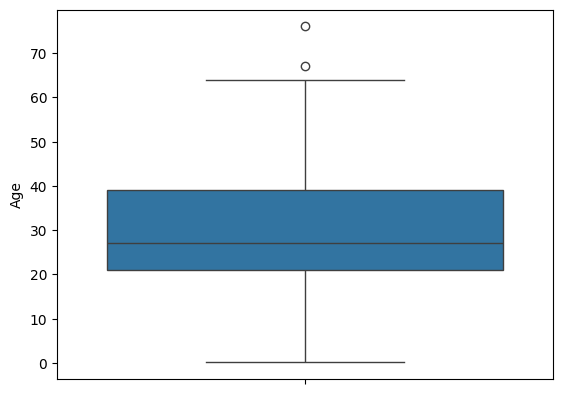

In [ ]:
#Identifying Outliers by ploting

from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['Age'])
plt.show()

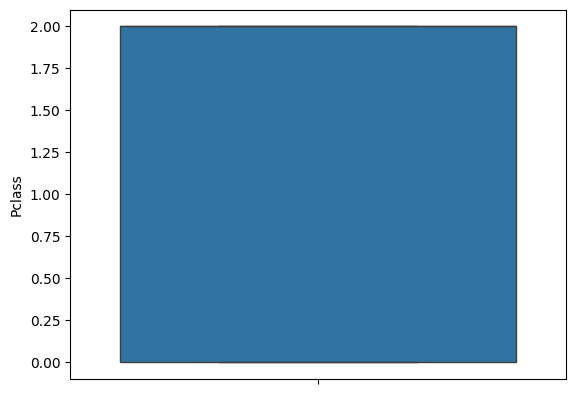

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64
18.0
66.0
-6.0
0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64


In [ ]:
#Identifying Outliers by ploting

from matplotlib import pyplot as plt
import seaborn as sns

# Convert 'Pclass' to numeric if it's not already
df['Pclass'] = pd.to_numeric(df['Pclass'], errors='coerce') # Convert to numeric, replace non-numeric with NaN

sns.boxplot(df['Pclass'])
plt.show()

#Dealing with Outliers using Interquantile Range

print(df['Age'])
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['Age'] < lower].values
out2=df[df['Age'] > upper].values

df['Age'].replace(out1,lower,inplace=True)
df['Age'].replace(out2,upper,inplace=True)

print(df['Age'])

In [ ]:
#Principal Component Analysis

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd # Import pandas for data manipulation
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling NaNs

logr=LogisticRegression()
pca=PCA(n_components=2)

# Drop non-numeric columns and the target variable
X = df.select_dtypes(include=['number']).drop('PassengerId', axis=1)  # Select only numeric columns
Y = df['Embarked']

# Handle NaNs using SimpleImputer - replace with mean
imputer = SimpleImputer(strategy='mean') # Create an imputer to fill NaN values with the mean
X = imputer.fit_transform(X) # Fit and transform the data to replace NaNs

pca.fit(X)
X=pca.transform(X)

print(X)

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print(accuracy_score(y_test,y_pred))

[[-2.73968282e+01  6.35902103e+00]
 [-2.72537568e+01  1.88681519e+01]
 [-2.34115447e+01  3.36433290e+01]
 [-2.71453041e+01 -1.18075685e+00]
 [-2.39091408e+01 -6.46933278e+00]
 [-2.75885365e+01 -1.41815397e+01]
 [-2.79421306e+01  1.88644615e+00]
 [-6.93138881e+00 -3.75318764e+00]
 [-2.92677061e+01 -1.00432244e+01]
 [-1.21628361e+01 -8.38034983e+00]
 [-2.76569242e+01  2.14034754e+00]
 [-8.37559222e+00  1.64532646e+01]
 [ 4.59481558e+01 -1.08342448e+01]
 [-7.06866376e+00  3.33680731e+01]
 [ 2.67741176e+01  1.47172171e+01]
 [-8.36352548e+00 -5.63966242e+00]
 [-2.28424131e+01  6.52620645e+00]
 [-2.90418322e+01 -7.04993948e+00]
 [-2.78762184e+01 -1.13766043e+00]
 [-2.71866141e+01  1.68684246e+01]
 [ 2.56207344e+01  2.28309548e+01]
 [-3.40065111e+01 -1.87080523e+01]
 [-3.92259081e+00  3.35403932e-01]
 [ 2.49692999e+01 -1.12101605e+01]
 [ 2.27452053e+02  1.29480224e-01]
 [-1.95464819e+01  2.12813991e+01]
 [ 2.56463460e+01 -1.02626350e+01]
 [-2.89259833e+01 -5.55486590e+00]
 [-4.27542684e+00  1